In [49]:
# import libraries
import joblib
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pandas as pd
import pydotplus

from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [50]:
# load dataset
src = "https://raw.githubusercontent.com/marwanmusa/dataset/main/drug200.csv"
df = pd.read_csv(src)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [51]:
# convert categorical to numerical val
d = {'M': 1, 'F': 0}
df['Sex'] = df['Sex'].map(d)

d = {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
df['BP'] = df['BP'].map(d)

d = {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
df['Cholesterol'] = df['Cholesterol'].map(d)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [54]:
# separate the feature(X) and target(y) columns
features = [col for col in df.columns if col != 'Drug']
X = df[features]

y = df['Drug']

In [57]:
print(X)
print(y)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            2   14.020
199   40    0   1            2   11.349

[200 rows x 5 columns]
0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


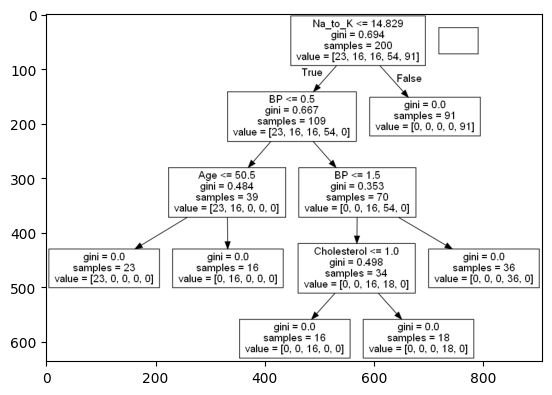

In [61]:
# create actual decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydtree.png')

img = pltimg.imread('mydtree.png')
plt.imshow(img)
plt.show()

In [62]:
# what is `value` in above img`
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [63]:
# model inferencing
"""
Predict Values
We can use the Decision Tree to predict new values.

Example: What prescription(among the five drugs: Y X A B and C) should a 68-year-old female
with normal levels of cholesterol and BP and has salt to potassium level of 27.10 take?
"""
dtree.predict([[68, 0, 2, 2, 27.10]])

d:\Learning_Django\ml_with_djangorest\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

In [64]:
# save the model
file_ = "DecissionTreeModel.joblib"
joblib.dump(dtree, file_)

['DecissionTreeModel.joblib']